# United States Kaggler Survey in 2017-2019
Kaggle is the world's largest community of data scientists. Kaggle is very popular to people who study or work in data science firled to find and publish data sets, explore and build models in a web-based science environment, work with other data scientists and machine learning engineers, and enter competition to solve data science challenges.

This notebook is to explore people in United States using Kaggle for their data science learning and working journey from 2017 to 2019. 

Percentage of USA respondents was decreasing from 2017 to 2019, whereas the percentage of respondents from other countries such as India, Brazil, Japan was increasing in the same period of time. It shows the rise of learning data science from other countries in the world. While the United States Kaggler community shows the slow-down and less interest of participating the annual Kaggler survey, it is not the case for other countries like India or Japan

,Country,Number_of_Respondents,Number_of_Respondents_percentage
0,United States of America,4716,20.700000
1,India,4417,19.400000
2,China,1644,7.200000
3,Russia,879,3.900000
4,Brazil,736,3.200000


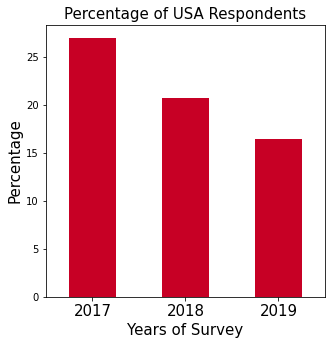

In [7]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', -1) #api

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') #import warnings package
#load survey data from 2019
multiple_choice_responses_2019 = pd.read_csv('2019_multiple_choice_responses.csv')

#Load survey data from 2018
multiple_choice_responses_2018 = pd.read_csv('2018_multipleChoiceResponses.csv')

#Load survey data from 2017
multiple_choice_responses_2017 = pd.read_csv('2017_multipleChoiceResponses.csv', encoding='ISO-8859-1')

#Preprocessing

#Copy original responses for futher processing
responses_2017_mod = multiple_choice_responses_2017.copy()
responses_2018_mod = multiple_choice_responses_2018.copy()
responses_2019_mod = multiple_choice_responses_2019.copy()

#Drop first row, which does not contain an actual data point
responses_2018_mod = responses_2018_mod.drop(responses_2018_mod.index[0]).reset_index(drop=True)
responses_2019_mod = responses_2019_mod.drop(responses_2019_mod.index[0]).reset_index(drop=True)

#Rename columns for more easier handling
questions_to_features_2017 = {'GenderSelect' : 'Gender'}

questions_to_features_2018 = {'Q1': 'Gender',
                             'Q3': 'Country',
                             'Q5': 'Major',
                             'Q6': 'Occupation',
                              'Q9' : 'Salary'}

questions_to_features_2019 ={'Q1': 'Age',
                            'Q2': 'Gender',
                            'Q3': 'Country',
                            'Q4': 'Education',
                            'Q5': 'Occupation',
                             'Q10': 'Salary'}

responses_2017_mod.rename(columns = questions_to_features_2017, inplace = True)
responses_2018_mod.rename(columns = questions_to_features_2018, inplace = True)
responses_2019_mod.rename(columns = questions_to_features_2019, inplace = True)
def convert_to_percentage(df):
    df = df.fillna(0)
    
    df['sum'] = df.sum(axis=1) # axis=1 means sum working along the row
    
    for col in df.columns:
        df[col]=(df[col]/df['sum']*100).round(1)
        
    df = df.drop('sum', axis=1)
    
    return df

#Convert range to mean
def convert_range_to_mean(range_str):
    if any(i.isdigit() for i in range_str):
        range_str = range_str.replace(',', '').replace('+', '').replace(' ','').replace('>','').replace('<','').replace('$','').replace('years','').replace('employees','')
        range_array = np.array(range_str.split('-'))
        range_array = range_array.astype(np.float)
        return np.mean(range_array)
    else:
        return 0

def create_dict_from_unique_values(df, column_name):
    unique_values = df[column_name].unique()
    dicts = {}
    for i in range(len(unique_values)):
        if type(unique_values[i]) is str:
            dicts[unique_values[i]] = convert_range_to_mean(unique_values[i])
        else:
            dicts[unique_values[i]] = 0
    return dicts

#Function to get participation by country with percentage
def get_participation_by_country(df):
    df_mod = df[df.Country != 'Other']
    df_mod = df_mod.groupby(['Country']).agg(Number_of_Respondents = ('Country', 'count')).sort_values('Number_of_Respondents', ascending = False).reset_index()
    df_mod['Number_of_Respondents_percentage'] = df_mod['Number_of_Respondents'].apply(lambda x: (x/df_mod.Number_of_Respondents.sum()*100).round(1))
    return df_mod

#get annual participation by country in percent

participation_2019 = get_participation_by_country(responses_2019_mod)
participation_2018 = get_participation_by_country(responses_2018_mod)
participation_2017 = get_participation_by_country(responses_2017_mod)

# get annual participation for United States in percent
participation_usa = pd.DataFrame(data = [participation_2017[participation_2017.Country=='United States'].Number_of_Respondents_percentage,
                                  participation_2018[participation_2018.Country=='United States of America'].Number_of_Respondents_percentage,
                                  participation_2019[participation_2019.Country=='United States of America'].Number_of_Respondents_percentage], 
                                  index = ['2017','2018', '2019'])

participation_usa['percentage']=participation_usa.max(axis=1)

#Plot figure
fig = participation_usa['percentage'].plot(kind = 'bar', color = ['#C70025'])
fig.set_title('Percentage of USA Respondents', fontsize =15)
plt.gcf().set_size_inches(5,5) #get the current figure in size of 5 x5
plt.xticks(rotation =0, fontsize =15) #used to get and set the current tick locations and labels of the x-labels
plt.xlabel('Years of Survey', fontsize =15)
plt.ylabel('Percentage', fontsize= 15)
#highlight United States
def highlight_us(x):
    if x.Country == 'United States of America':
        return ['background_color: #ffe2d8']*3
    else:
        return ['background_color: ']*3

participation_2018.head().style.set_caption('Countries Ranked By Number of Respondents in 2018 Kaggle Survey').apply(highlight_us, axis=1)
#highlight United States
def highlight_us(x):
    if x.Country == 'United States of America':
        return ['background_color: #ffe2d8']*3
    else:
        return ['background_color: ']*3

participation_2018.head().style.set_caption('Countries Ranked By Number of Respondents in 2018 Kaggle Survey').apply(highlight_us, axis=1)



In [4]:

participation_2019.head().style.set_caption('Countries Ranked By Number of Respondents in 2019 Kaggle Survey').apply(highlight_us, axis=1)

,Country,Number_of_Respondents,Number_of_Respondents_percentage
0,India,4786,25.600000
1,United States of America,3085,16.500000
2,Brazil,728,3.900000
3,Japan,673,3.600000
4,Russia,626,3.400000


Disclaimer: 
This analysis excludes unrealistics annual compensation of less than 20,000 USD for data scientists in high cost country like United States of America


,Number_of_Respondents,Year
Gender,,
Female,132,2019
Male,537,2019
Female,173,2018
Male,581,2018


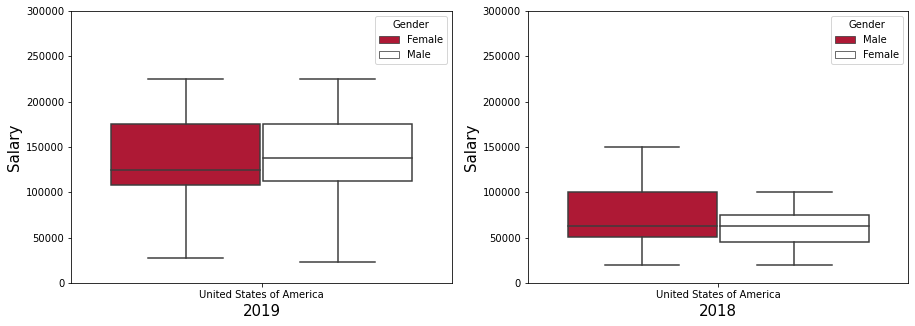

In [8]:


#Columns we need to create a graph to compare salary between man and woman who are data scientist in 2019 in United States
#are Gender, Country, Salary, Occupation as Data Scientist.

#First step is salary column, it is categorical colum, so we need to convert it to numerical. It represents as range, we 
#take the mean of range.

#Convert categorical salary column to numerical
label_encoding_salary_1 = {}
label_encoding_salary_1['Salary'] = create_dict_from_unique_values(responses_2019_mod, 'Salary')
responses_2019_mod.replace(label_encoding_salary_1, inplace= True)

label_encoding_salary_2 = {}
label_encoding_salary_2['Salary'] = create_dict_from_unique_values(responses_2018_mod, 'Salary')
responses_2018_mod.replace(label_encoding_salary_2, inplace= True)

#Selecting data scientist from USA with realistic salary
data_scientists_selection_2019 = responses_2019_mod[((responses_2019_mod.Country == 'United States of America')) 
                                                & ((responses_2019_mod.Gender == 'Male')
                                                | (responses_2019_mod.Gender == 'Female'))
                                                & (responses_2019_mod.Salary > 20000)
                                                & (responses_2019_mod.Occupation == 'Data Scientist')]
data_scientists_selection_2018 = responses_2018_mod[((responses_2018_mod.Country == 'United States of America')) 
                                                & ((responses_2018_mod.Gender == 'Male')
                                                | (responses_2018_mod.Gender == 'Female'))
                                                & (responses_2018_mod.Salary > 20000)
                                                & (responses_2018_mod.Occupation == 'Data Scientist')]
fig, axes = plt.subplots(1,2)
sns.boxplot(x = 'Country', 
                  y = 'Salary', 
                  hue= 'Gender', 
                  palette = ['#C70025', 'white'],
                  ax = axes[0],
                  data = data_scientists_selection_2019,
                  fliersize = 0)
sns.boxplot(x = 'Country', 
                  y = 'Salary', 
                  hue= 'Gender', 
                  palette = ['#C70025', 'white'],
                  ax = axes[1], 
                  data = data_scientists_selection_2018,
                  fliersize = 0)
fig.set_size_inches(15,5)
axes[0].set_xlabel('2019', fontsize = 15)
axes[1].set_xlabel('2018', fontsize =15)
for i in range(2):
    axes[i].set_ylim(0,300000)
    axes[i].set_ylabel('Salary', fontsize=15)
plt.show

print('Disclaimer: \nThis analysis excludes unrealistics annual compensation of less than 20,000 USD for data scientists in high cost country like United States of America')
x=data_scientists_selection_2019.groupby(['Gender']).agg(Number_of_Respondents = ('Salary','count'))
x['Year'] = ['2019','2019']
y=data_scientists_selection_2018.groupby(['Gender']).agg(Number_of_Respondents = ('Salary','count'))
y['Year'] = ['2018', '2018']
z= pd.concat([x,y])
z

# Salary of female and male data scientist in United States in 2018 and 2019

The average salary of female and male data scientists in United States in 2018 is approximately similar. While the salary for male was more spreading from $50000 to $100000, the salary for female is around less than $50000 to $75000. 

The ratio of respondents of USA male and female in 2019 doesn't have the big change compared to that in 2018, average of salary of USA Kaggler woman is slightly higher than for man. The overall average salary for both man and woman is significant higher than that in 2018.

According to Indeed, Data Scientist job postings rose 31% in December 2018, compared with the same period the year before. Yet data science job searches as a share of tatal job searches rose 14% in 2018 over the same year. According to the the change of market job need and supply, there are still not enough data science candidates to meet the growth in demand. The increase in salary can be the effort from US company to attract potential candidates to work for them. Although the ratio of woman in data science workforce is still small, there is no difference in annual salry between man and woman in 2019. It raises the quesion for me that whether or not data science has fixed gender pay gap. 

<function matplotlib.pyplot.show(close=None, block=None)>

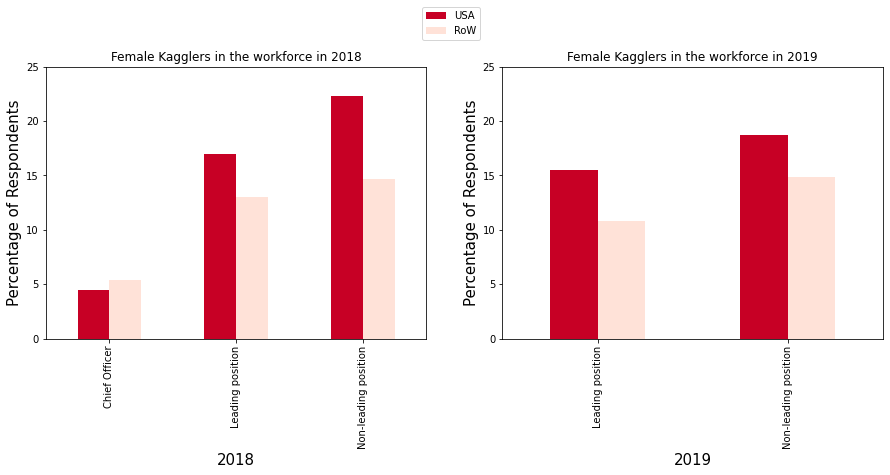

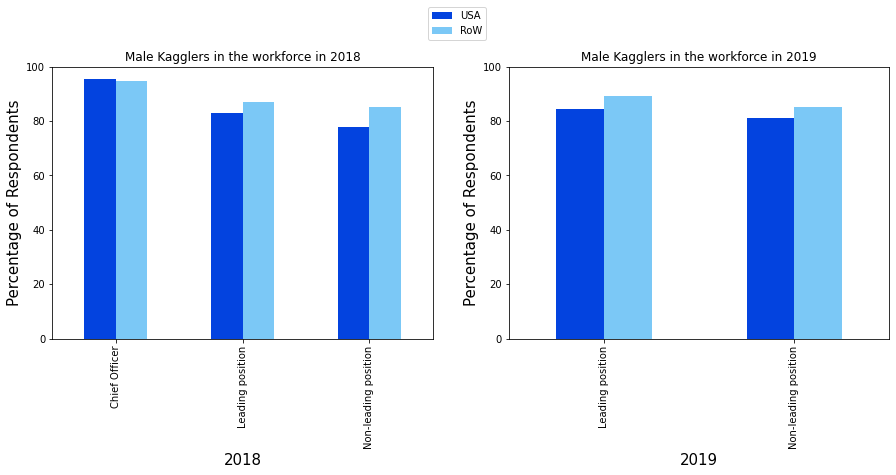

In [9]:
#According to Kaggle competitors
position_grouped = {'Data Scientist' : "Non-leading position",
                   'Software Engineer' : 'Non-leading position',
                    'Manager' : 'Leading position',
                    'Research Assistant' : 'Leading position',
                   'Research Scientist' : 'Non-leading position',
                   'Data Analyst' : 'Non-leading position',
                   'Product/Project Manager' : 'Leading position',
                   'Statistician' : 'Non-leading position',
                   'Business Analyst' : 'Non-leading position',
                   'Data Engineer' : 'Non-leading position',
                   'Consultant' : 'Non-leading position',
                    'Marketing Analyst' : 'Non-leading position',
                    'Principal Investigator' : 'Leading position',
                    'Developer Advocate' : 'Non-leading position',
                    'Salesperson': 'Non-leading position',
                     'DBA/Database Engineer' : 'Non-leading position',
                     'Data Journalist' : 'Non-leading position'}
leading_positions = responses_2018_mod.copy()

leading_positions['Occupation'].replace(position_grouped, inplace = True)
#Prepare data
def get_gender_distribution_by_position(df):
    df = df[(df.Occupation != 'Student')
            & (df.Occupation != 'Other')
            & (df.Occupation != 'Not employed')
            & ((df.Gender == 'Female') | (df.Gender == 'Male'))]
    
    df = df.groupby(['Occupation','Gender']).Country.count().to_frame().reset_index()
    df = df.pivot(index = 'Occupation', columns = 'Gender')['Country']
    df = convert_to_percentage(df)
    return df

gender_distribution_position = pd.DataFrame(data = [get_gender_distribution_by_position(leading_positions[leading_positions.Country == 'United States of America']).Female,
                                           get_gender_distribution_by_position(leading_positions[leading_positions.Country != 'United States of America']).Female],
                                            index = ['USA', 'RoW'])

leading_positions_2019 = responses_2019_mod.copy()

leading_positions_2019['Occupation'].replace(position_grouped, inplace = True)
#Prepare data

gender_distribution_position_2019 = pd.DataFrame(data = [get_gender_distribution_by_position(leading_positions_2019[leading_positions_2019.Country == 'United States of America']).Female,
                                           get_gender_distribution_by_position(leading_positions_2019[leading_positions_2019.Country != 'United States of America']).Female],
                                            index = ['USA', 'RoW'])

#plot graph for two year
fig, axes = plt.subplots(1,2)
gender_distribution_position.T.plot(kind='bar', 
                                       color = ['#C70025', '#ffe2d8'], ax=axes[0], title ='Female Kagglers in the workforce in 2018')
gender_distribution_position_2019.T.plot(kind='bar', 
                                       color = ['#C70025', '#ffe2d8'], ax=axes[1],
                                        title = 'Female Kagglers in the workforce in 2019')

fig.set_size_inches(15,5)
axes[0].set_xlabel('2018', fontsize = 15)
axes[1].set_xlabel('2019', fontsize =15)
for i in range(2):
    axes[i].set_ylim(0,25)
    axes[i].set_ylabel('Percentage of Respondents', fontsize=15)
    axes[i].get_legend().remove()

fig.legend(bbox_to_anchor=(0.5,1.0), loc='center', labels =['USA', 'RoW'])
plt.show
#try to see the difference in Kagglers male in workforce in 2018 and 2019
male_gender_distribution_position = pd.DataFrame(data = [get_gender_distribution_by_position(leading_positions[leading_positions.Country == 'United States of America']).Male,
                                           get_gender_distribution_by_position(leading_positions[leading_positions.Country != 'United States of America']).Male],
                                            index = ['USA', 'RoW']) #in 2019
male_gender_distribution_position_2019 = pd.DataFrame(data = [get_gender_distribution_by_position(leading_positions_2019[leading_positions_2019.Country == 'United States of America']).Male,
                                           get_gender_distribution_by_position(leading_positions_2019[leading_positions_2019.Country != 'United States of America']).Male],
                                            index = ['USA', 'RoW']) #in 2018
#plot distribution of male Kagglers in workforce in 2018 and 2019
fig, axes = plt.subplots(1,2)
male_gender_distribution_position.T.plot(kind='bar', 
                                       color = ['#0343DF','#7BC8F6'], ax=axes[0], title ='Male Kagglers in the workforce in 2018')
male_gender_distribution_position_2019.T.plot(kind='bar', 
                                       color = ['#0343DF','#7BC8F6'], ax=axes[1],
                                        title = 'Male Kagglers in the workforce in 2019')

fig.set_size_inches(15,5)
axes[0].set_xlabel('2018', fontsize = 15)
axes[1].set_xlabel('2019', fontsize =15)
for i in range(2):
    axes[i].set_ylim(0,100)
    axes[i].set_ylabel('Percentage of Respondents', fontsize=15)
    axes[i].get_legend().remove()

fig.legend(bbox_to_anchor=(0.5,1.0), loc='center', labels =['USA', 'RoW'])
plt.show

# Male and Female Kaggler in the workforce in 2018 and 2019

Percentage of USA female respondents in the workforce in overall is higher than that for the rest of the world in both 2018 and 2019. However, the number of female in the positions related to data science, machine learning is increasing in the world. 

Woman now have the same exposure to platforms and tools related to machine learning, data science, explaining the increasing trend of woman in this field. Despite the fact that the number of female is still relative small, we can expect the rise of woman and their contribution in this field not far from today. 

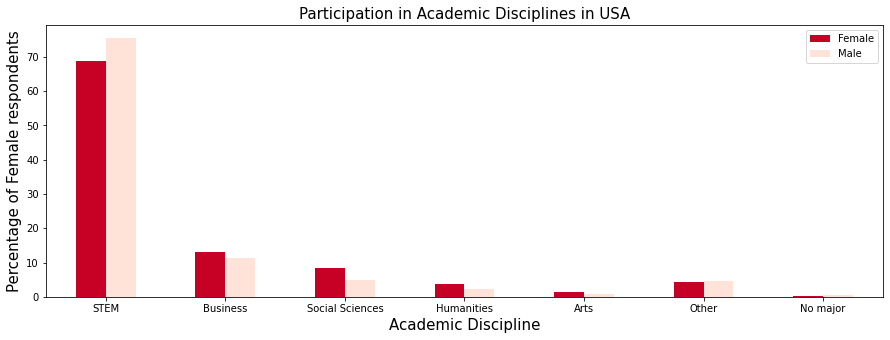

In [10]:
#Dictionary to group STEM disciplines
studies_grouped = {'Computer science (software engineering, etc.)' : 'STEM',
                   'Engineering (non-computer focused)' : 'STEM',
                   'Mathematics or statistics' : 'STEM', 
                   'Physics or astronomy' : 'STEM',
                   'Information technology, networking, or system administration' : 'STEM',
                   'Environmental science or geology' : 'STEM',
                   'Medical or life sciences (biology, chemistry, medicine, etc.)' : 'STEM',
                   'A business discipline (accounting, economics, finance, etc.)' : 'Business',
                   'Social sciences (anthropology, psychology, sociology, etc.)' : 'Social Sciences',
                   'Humanities (history, literature, philosophy, etc.)' : 'Humanities',
                   'Fine arts or performing arts' : 'Arts',
                   'I never declared a major' : 'No major'}

responses_2018_mod.Major = responses_2018_mod.Major.replace(studies_grouped)
df_female = responses_2018_mod[(responses_2018_mod.Country == 'United States of America')
                              & (responses_2018_mod.Gender == 'Female')].groupby('Major')['Major'].count()

df_male = responses_2018_mod[(responses_2018_mod.Country == 'United States of America')
                              & (responses_2018_mod.Gender == 'Male')].groupby('Major')['Major'].count()

gender_distribution_usa = pd.DataFrame(data =[df_female, df_male], index =['Female','Male'])

gender_distribution_usa['total']= [df_female.sum(), df_male.sum()]

gender_distribution_usa.fillna(0)

for col in gender_distribution_usa.columns:
    gender_distribution_usa['{} (%)'.format(col)] = gender_distribution_usa[col]/gender_distribution_usa['total']*100
    
rearranged_columns = ['STEM (%)',
                      'Business (%)',
                      'Social Sciences (%)',
                      'Humanities (%)',
                      'Arts (%)',
                      'Other (%)',
                      'No major (%)' ]
#plot figure
fig = gender_distribution_usa[rearranged_columns].T.plot(kind='bar',
                                                                      color =['#C70025','#ffe2d8'])
plt.gcf().set_size_inches(15,5)
fig.set_title('Participation in Academic Disciplines in USA', fontsize=15)
plt.xticks(np.arange(7), ('STEM', 'Business', 'Social Sciences','Humanities', 'Arts', 'Other', 'No major'), rotation =0, fontsize=10)
plt.xlabel('Academic Discipline', fontsize =15)
plt.ylabel('Percentage of Female respondents', fontsize=15)
plt.show()

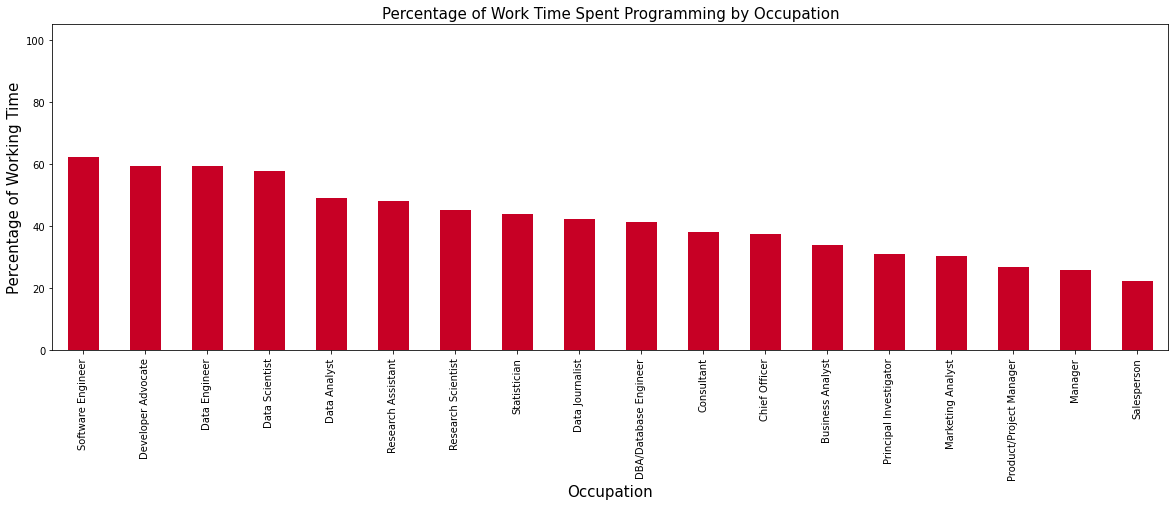

In [11]:
# Get working people
working_people = responses_2018_mod[(responses_2018_mod.Occupation != 'Student') 
                                    & (responses_2018_mod.Occupation != 'Other') 
                                    & (responses_2018_mod.Occupation != 'Not employed')]

# Convert categorical column (Q23: time spent coding) to numerical column
time_spent_coding = {'0% of my time' : 0,
                     '75% to 99% of my time' : 88,
                     '50% to 74% of my time': 63,
                     '100% of my time' : 100, 
                     '25% to 49% of my time' : 38,
                     '1% to 25% of my time' : 13}
            
working_people.Q23.replace(time_spent_coding, inplace=True)

# Prepare data
working_people = working_people.groupby('Occupation').Q23.mean().reset_index().sort_values('Q23', ascending = False)

# Plot figure
fig = working_people.set_index('Occupation').Q23.plot(kind = 'bar',
                                                      color = ['#C70025'])

fig.set_title('Percentage of Work Time Spent Programming by Occupation', fontsize = 15)                                            

plt.gcf().set_size_inches(20,6)
plt.xlabel('Occupation', fontsize = 15)
plt.ylabel('Percentage of Working Time', fontsize = 15)
fig.set_ylim(0, 105)
plt.show()